## Example TimeMCL for toy datasets.

This notebook contains an example for training TimeMCL on synthetics dataset.

### Setup

First create the conda virtual environment with the required packages with `cd tsExperiments ; bash setup-env.sh`. Then activate it before running the next cells.

### Training

Training can be performed with the following commands

In [1]:
import os
import sys
import numpy as np
import rootutils
import torch 
rootutils.setup_root(search_from='.', indicator=".project-root", pythonpath=True)

sys.path.append(os.path.dirname(os.environ["PROJECT_ROOT"]))
sys.path.append(os.path.join(os.environ["PROJECT_ROOT"], "toy"))
from toy import tMCL, train_tMCL, plot_brownian_bridge,plot_brownien,plot_ARp_quantization
import time
import torch 


Three datasets are supported, Brownian motion, ARp and brownian bridge.

In [2]:
dataset_name = "ARp" #"brownian_bridge" ,"brownian_motion" or "ARp"

In [3]:
nb_discretization_points = 500
batch_size=  4096
nb_step_simulation= 250
device= "cuda" if torch.cuda.is_available() else "cpu"
t_condition= 100 if "ARp" else 0.5
wta_mode= "relaxed_wta"
cond_dim= 2 if "brownian_bridge" else 1 if "brownian_motion" else 5 
n_hypotheses= 10
num_steps= 10 #500
learning_rate= 0.001
sigma =  0.06 if "ARp" else None
p = 5 if "ARp" else None
coefficients = [0.4, 0.2, 0.2, 0.1, 0.1] if "ARp" else None
init_values = [0.2,0.2,0.2,0.2,0.2] if "ARp" else None

nb_step_simulation_model = nb_step_simulation
interval_length = nb_step_simulation

In [4]:
model = tMCL(
    cond_dim=cond_dim,
    nb_step_simulation=nb_step_simulation_model,
    n_hypotheses=n_hypotheses,
    device=device,
    loss_type=wta_mode,
)

In [ ]:
additional_params = {"p": p, "coefficients": coefficients, "sigma": sigma, "init_values": init_values} if "ARp" else {}

start_time = time.time()

trained_model = train_tMCL(
model=model,
process_type=dataset_name,
num_steps=num_steps,
batch_size=batch_size,
nb_discretization_points=nb_discretization_points,
interval_length=interval_length,
device=device,
learning_rate=learning_rate,
additional_params=additional_params,
)

end_time = time.time()

KeyError: 'init_values'

### Plotting ARp

In [ ]:
time_observed,y_observed,time_future,kmeans_centroids,predictions_neural = plot_ARp_quantization(
    batch_size,
    nb_discretization_points,
    interval_length,
    coefficients,
    sigma,
    t_condition,
    trained_model,
    nb_clusters=10,
    ax=None,
)

### Plotting Brownian Bridge 

In [6]:
batch_size = 1000
interval_length = nb_step_simulation_model
m = 2 # parameter m in the K-L decomposition of the eigenfunctions
N_levels = [5, 2] # number of levels for the quantization of the eigenfunctions
a = 0
b = 1
pred_length = nb_step_simulation_model
num_steps = 300


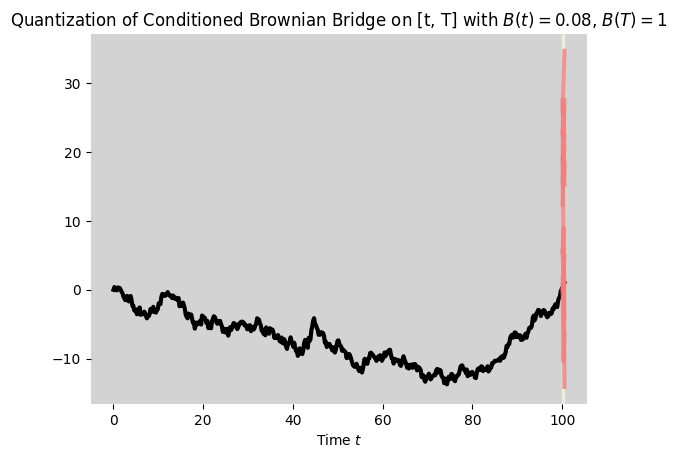

In [7]:
t_observed,bridge_0_t,t_quantized,trajectories_quantized,predictions_neural =plot_brownian_bridge( interval_length,
    nb_discretization_points,
    m,
    N_levels,
    a,
    b,
    t_condition,
    trained_model,
    ax=None,)